In [2]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=4e96270faef1b28e91a68ea51b33a4a0aafaeec63d5bceee37e438a60d8d17b0
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [4]:
%cd "drive/MyDrive/Bionformatics_Project/Colab"

/content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab


In [5]:
from Classes.DataManager import DataManager
from Classes.Transformer import projTransformer
from tensorflow import keras
import numpy as np

%load_ext tensorboard

importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/Transformer.ipynb
Populating the interactive namespace from numpy and matplotlib
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [6]:
print("> Loading DataManager...")
dm = DataManager(DeepLncLoc = True, tf=True)

print("> Loading train data...")
X_trainhalflife, X_trainpromoter, y_train, X_traintf                = dm.get_train()

print("> Loading validation data...")
X_validationhalflife, X_validationpromoter, y_validation, X_validtf = dm.get_validation()

print("> Loading test data...")
X_testhalflife, X_testpromoter, y_test, X_testtf                    = dm.get_test()

print("\n**************\n     DONE\n**************\n")

> Loading DataManager...
> Loading train data...
> Loading validation data...
> Loading test data...

**************
     DONE
**************



data loading takes at most 30s, we can improve it saving the numerical representation of sequences

Preprocessing-> Padding

In [7]:

print(X_trainpromoter.shape)
print(X_validationpromoter.shape)
print(X_testpromoter.shape)

maxlen=X_trainpromoter.shape[1]
print(maxlen)

(15453, 210, 64)
(1000, 210, 64)
(999, 210, 64)
210


INFO:tensorflow:Initializing the TPU system: grpc://10.108.14.26:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.108.14.26:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


model built
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 210, 64)]         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 210, 64)           256       
_________________________________________________________________
position_encoding2 (Position (None, 210, 64)           0         
_________________________________________________________________
transformer_block (Transform (None, 210, 64)           116224    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)         

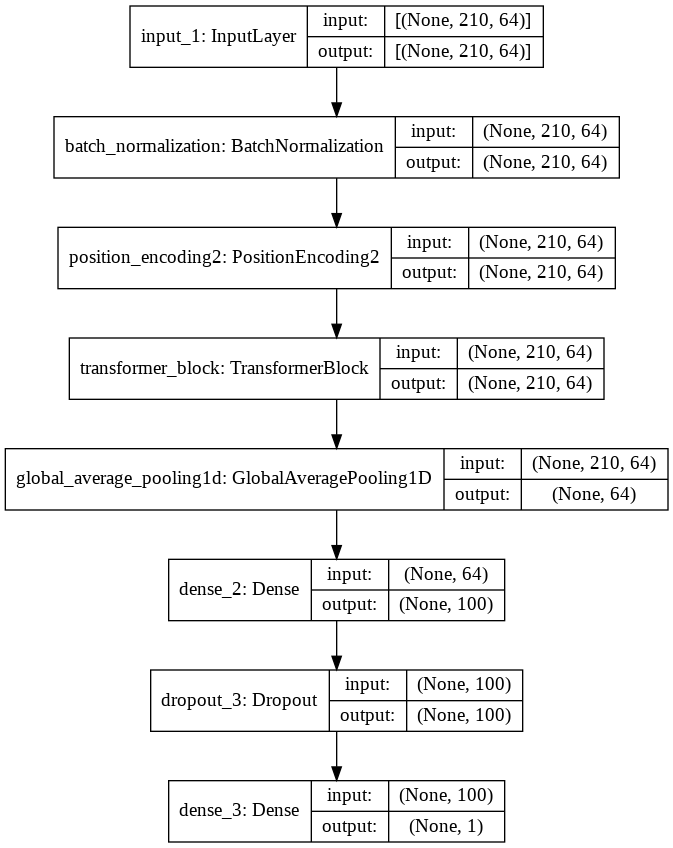


Parameters:
{'checkpoint_dir': 'DeepLncLoc_transformer_TPU/', 'model_type': 'DeepLncLoc_onlyPromo', 'n_epochs': 300, 'batch_size': 256, 'learning_rate': 0.0005, 'momentum': 0.9, 'maxlen': 210, 'embed_dim': 64, 'num_heads': 4, 'ff_dim': 384, 'vocab_size': 5, 'dense': 100, 'dropout_rate': 0.1, 'lr_reduction_epoch': None, 't_rate': 0.1, 'patience': 20, 'optimizer': 'Adam', 'warmup_steps': 4000, 'shuffle': True, 'logdir': None, 'loss': 'mse', 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f122f6cb310>}



In [8]:
# # Clear any logs from previous runs
# !rm -rf ./logs/transformer_new_embedding_0-002/

model_type="DeepLncLoc_onlyPromo"
logdir = None
checkpoint_dir = "DeepLncLoc_transformer_TPU/"
loss = "mse"

######################################################################################################################
import tensorflow as tf
tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)


with strategy.scope():
    net = projTransformer(checkpoint_dir=checkpoint_dir, model_type=model_type, n_epochs=300, batch_size=256, 
                      learning_rate=5e-4, lr_reduction_epoch=None, maxlen=maxlen, embed_dim=64, num_heads=4, ff_dim=384, dense=100, 
                      dropout_rate=0.1, logdir=logdir, optimizer="Adam", warmup_steps=4_000, patience=20)
    
########################################################################################################################


Epoch 1/300
61/61 [==============================] - 13s 97ms/step - loss: 0.9508 - val_loss: 0.9688
Epoch 2/300
61/61 [==============================] - 1s 23ms/step - loss: 0.6921 - val_loss: 0.9163
Epoch 3/300
61/61 [==============================] - 2s 26ms/step - loss: 0.6054 - val_loss: 1.0303
Epoch 4/300
61/61 [==============================] - 1s 24ms/step - loss: 0.5723 - val_loss: 1.2574
Epoch 5/300
61/61 [==============================] - 1s 24ms/step - loss: 0.5600 - val_loss: 1.2855
Epoch 6/300
61/61 [==============================] - 1s 24ms/step - loss: 0.5497 - val_loss: 1.1331
Epoch 7/300
61/61 [==============================] - 1s 23ms/step - loss: 0.5259 - val_loss: 0.6853
Epoch 8/300
61/61 [==============================] - 1s 24ms/step - loss: 0.5434 - val_loss: 0.5978
Epoch 9/300
61/61 [==============================] - 2s 25ms/step - loss: 0.5225 - val_loss: 0.7198
Epoch 10/300
61/61 [==============================] - 1s 24ms/step - loss: 0.5073 - val_loss: 0.496

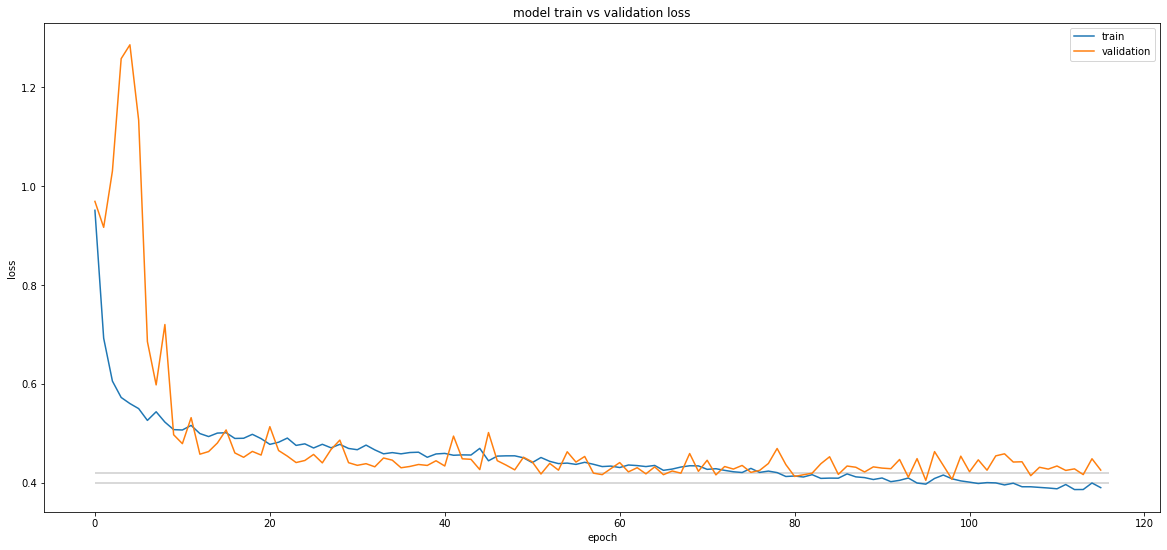

In [9]:
net.train_model([X_trainpromoter], y_train, [X_validationpromoter], y_validation, True)

In [10]:
net.evaluate([X_testpromoter], y_test)

Test R^2 = 0.608


In [11]:
net.evaluate_best([X_testpromoter], y_test, True)

Test R^2 = 0.608


0.607981733055192

In [12]:
# net.plot_train()

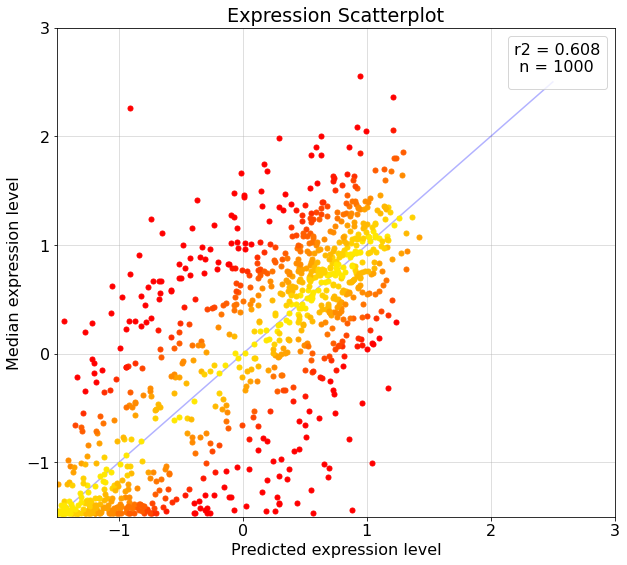

In [13]:
net.plot_r2([X_testpromoter], y_test, True)

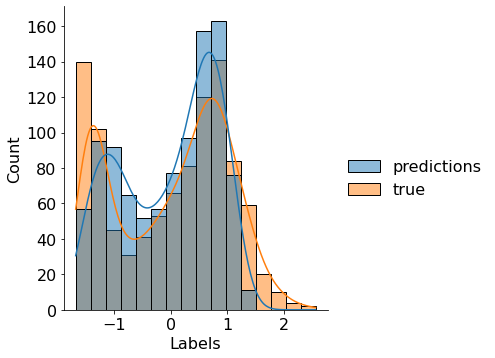

In [14]:
net.plot_kde([X_testpromoter], y_test, True)